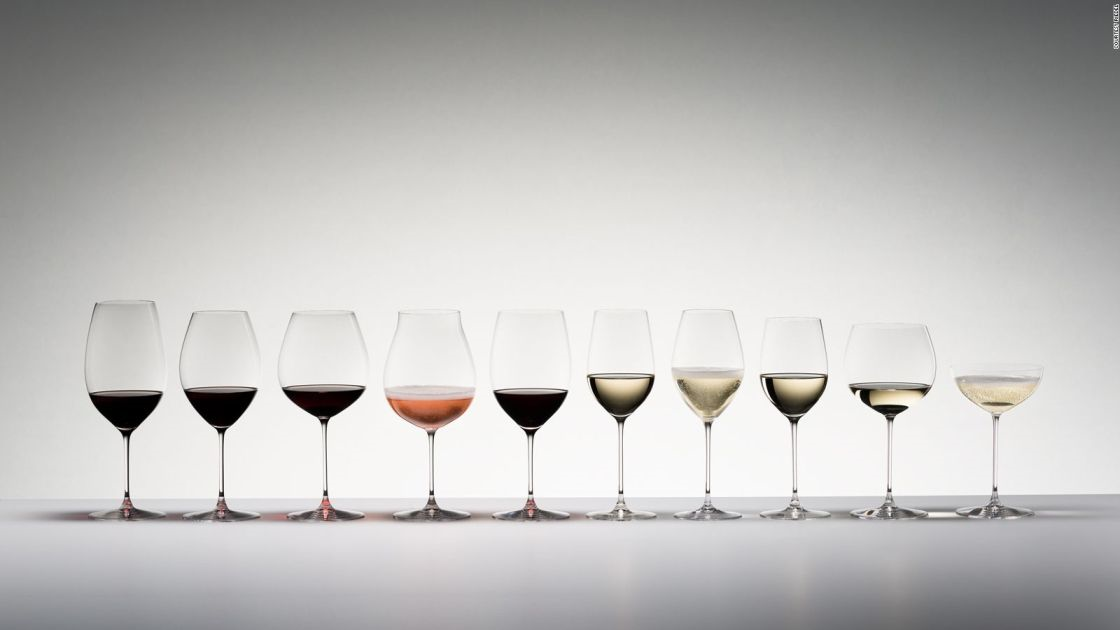

# Thank You for opening this notebook!!!
## This notebook tutorial is for those who are beginners to machine learning.

*In this notebook, First I have done some exploration on the data using matplotlib and seaborn with mplcyberpunk for the glowing effects. Then, I use different classifier models to predict the quality of the wine.*

__1. Logistic Regression__

__2. K Nearest Neighbour Classifier__

__3. Support Vector Classifier(SVC)__

__4. Multi Level Perceptron Classifier__

__5. Random Forest Classifier__

## Intermediate and advanced level people can skip to the PyCaret section.

*In the end,I use a low code ML library called as __PyCaret__,this library automatically fits different classifier models to the data and gives output within seconds.I urge all the intermediate and advanced level ML enthusiasts to have a look at __PyCaret__ implementation as it is really useful for deciding which models to focus on and also helps in its fine tuning*

### If you find this notebook useful then please upvote.¶

In [ ]:
!pip install pycaret==2.0

In [ ]:
!pip install mplcyberpunk

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import mplcyberpunk
from sklearn.datasets import load_wine
plt.style.use("cyberpunk")
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
import warnings
warnings.filterwarnings("ignore")

## Creating The Dataset.

In [ ]:
wine=load_wine()
df = pd.DataFrame(wine['data'],columns = wine['feature_names'])
df.head()

The column name % of diluted wines is not named properly so we rename the column.

In [ ]:
df = df.rename(columns={'od280/od315_of_diluted_wines': '% of diluted_wines'})

In [ ]:
wine.keys()

In [ ]:
y=wine['target']
y

In [ ]:
df['label']=y
data_pycaret=df.copy()
df.head()

In [ ]:
df.describe()

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [ ]:
df.isnull().sum() # checking for null values

Fortunately the dataset has no null values.

# Data Visualization

In [ ]:
## plotting the target values
sns.countplot(df['label'])
mplcyberpunk.add_glow_effects()
plt.show()

In [ ]:
#Plot a boxplot to check for Outliers
#Target variable is Label. So will plot a boxplot each column against target variable
sns.boxplot('label', 'alcohol', data = df)

In [ ]:
sns.boxplot('label', 'malic_acid', data = df)

In [ ]:
sns.boxplot('label', 'ash', data = df)

In [ ]:
sns.boxplot('label', 'alcalinity_of_ash', data = df)

In [ ]:
sns.boxplot('label', 'magnesium', data = df)

In [ ]:
sns.boxplot('label', 'color_intensity', data = df)

In [ ]:
sns.boxplot('label', 'hue', data = df)

# Splitting The Data into Train and Test sets.

But First we will label encode the target variable and  Standard scaling to feature values to get optimized result.

In [ ]:
le = LabelEncoder()
df['label']=le.fit_transform(df['label'])
sc = StandardScaler()
x = sc.fit_transform(df.iloc[:,:-1])

In [ ]:
X_train, X_test, y_train,y_test = train_test_split(df.iloc[:,:-1], y, test_size = 0.2,random_state=2)

**1. Logistic Regression**

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)

In [ ]:
print(classification_report(y_test,lr_predict))

**Logistic Regression gives 92% accuracy.**

In [ ]:
print(confusion_matrix(y_test,lr_predict))

**2. K Nearest Neighbour**

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))

**KNN gives 92% accuracy.**

In [ ]:
print(confusion_matrix(y_test,y_pred))

**3. Support Vector Machine- SVC** 

In [ ]:
svc = SVC()
svc.fit(X_train, y_train)
y_pred=svc.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))

**SVC gives 69% accuracy.**

In [ ]:
print(confusion_matrix(y_test,y_pred))

**4. Multi Level Perceptron Classifier**

In [ ]:
mlp=MLPClassifier()
mlp.fit(X_train,y_train)
y_pred=mlp.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))

**MLP only gives  94% accuracy**

In [ ]:
print(confusion_matrix(y_test,y_pred))

**5.Random Forest Classifier**

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred=rf.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))

**Random Forest Turned Out to be the best Classifier giving 97% accuracy.**

In [ ]:
print(confusion_matrix(y_test,y_pred))

#### The above part required a lot of effort and coding to create.Now lets go to the easiest and most fun part

# Pycaret Implementation

In [ ]:
from pycaret.classification import *
wine= setup(data = data_pycaret, target = 'label',
            remove_outliers=True,
            session_id=1)

Just one more step and we are done.It saves a lot of time and efforts which can help us in prioritizing model,so that we can mainly focus on feature engineering.

In [ ]:
compare_models()

We observe that just by removing outliers the accuracy of all the models increase considerably.

<font size="+2" color="chocolate"><b>My Other Kernels</b></font><br>

#### Click on the button to view kernels...


<a href="https://www.kaggle.com/darthmanav/explaining-resnet-model-fine-tuning-pca-t-sne" class="btn btn-primary" style="color:white;">Explaining ResNet architecture</a>

<a href="https://www.kaggle.com/darthmanav/explaining-alexnet-model-tutorial-fine-tuning-pca" class="btn btn-primary" style="color:white;">Explaining AlexNet architecture</a>

<a href="https://www.kaggle.com/darthmanav/multilayer-perceptron-fine-tuning-pca-t-sne-mnist" class="btn btn-primary" style="color:white;">Explaining Multi layer Perceptron architecture</a>

<a href="https://www.kaggle.com/darthmanav/explaining-vgg-model-fine-tuning-pca-t-sne" class="btn btn-primary" style="color:white;">Explaining VGG architecture</a>

<a href="https://www.kaggle.com/darthmanav/predicting-wine-quality-using-svm-knn-with-eda" class="btn btn-primary" style="color:white;">Wine Quality using SVM,KNN</a>

<a href="https://www.kaggle.com/darthmanav/glove-lstm-sentiment-analysis-for-beginners" class="btn btn-primary" style="color:white;">NLP tutorial on Glove and LSTM</a>

<a href="https://www.kaggle.com/darthmanav/horse-vs-human-classification-by-resnet50-beginner" class="btn btn-primary" style="color:white;">Horse Vs Humans</a>

<br>

###  If these kernels impress you,give them an <font size="+2" color="red"><b>Upvote</b></font>.<br>
